In [1]:
# Load dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# Load data from the csv file

datadf = pd.read_csv("Dataset/fraud_data.csv")

# Descriptive statistics of the data
print(datadf.describe())

# Describe the data
print(datadf.info())

                amt           lat          long      city_pop     merch_lat  \
count  14446.000000  14446.000000  14446.000000  1.444600e+04  14446.000000   
mean     124.430073     39.787692   -110.874225  1.065370e+05     39.787991   
std      231.352587      5.317039     12.985813  2.902916e+05      5.360593   
min        1.000000     20.027100   -165.672300  4.600000e+01     19.032689   
25%       12.080000     36.715400   -120.415800  4.930000e+02     36.794655   
50%       51.520000     39.666200   -111.098500  1.645000e+03     39.620953   
75%      101.030000     41.940400   -101.136000  3.543900e+04     42.275740   
max     3261.470000     66.693300    -89.628700  2.383912e+06     67.510267   

         merch_long  
count  14446.000000  
mean    -110.874892  
std       12.995596  
min     -166.670685  
25%     -120.146253  
50%     -111.192629  
75%     -100.446822  
max      -88.646366  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (

In [3]:
# Convert 'trans_date_trans_time' column to datetime type
datadf['trans_date_trans_time'] = pd.to_datetime(datadf['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

# Extract date components from 'trans_date_trans_time'
datadf['trans_year'] = datadf['trans_date_trans_time'].dt.year
datadf['trans_month'] = datadf['trans_date_trans_time'].dt.month
datadf['trans_day'] = datadf['trans_date_trans_time'].dt.day
datadf['trans_hour'] = datadf['trans_date_trans_time'].dt.hour
datadf['trans_minute'] = datadf['trans_date_trans_time'].dt.minute
datadf['trans_second'] = datadf['trans_date_trans_time'].dt.second

# Convert 'dob' column to datetime type 
datadf['dob'] = pd.to_datetime(datadf['dob'], format='%d-%m-%Y')

# Extract year from 'dob'
datadf['dob_year'] = datadf['dob'].dt.year


# Drop unwanted rows and clean up formatting
datadf = datadf[(datadf['is_fraud'] == "0") | (datadf['is_fraud'] == "1")]
datadf.dropna()
datadf = datadf[datadf["amt"]<=1500]
datadf['merchant'] = datadf['merchant'].str.replace('"', '')
datadf['job'] = datadf['job'].str.replace('"', '')

# Update the datadf['is_fraud] to datatype int
datadf['is_fraud'] = datadf['is_fraud'].astype(int)

# Create sub-dataframes and print confines of dataset
datadf #complete and cleaned dataframe
#frauddf = datadf[datadf["is_fraud"]=="1"] #dataframe of all fradulent data (best for after all columns are added)
#truedf = datadf[datadf["is_fraud"]=="0"] #dataframe of all clean data (best for after all columns are added)

# Print the number of transactions in the dataset
print(f'The dataset contains {len(datadf)} transactions.')
# Print the time period of the dataset
print(f'The dataset transactions begin on {datadf["trans_date_trans_time"].min()}.')
print(f'The dataset transactions end on {datadf["trans_date_trans_time"].max()}.')


The dataset contains 14435 transactions.
The dataset transactions begin on 2019-01-01 00:00:00.
The dataset transactions end on 2020-12-31 23:59:00.


In [4]:
# Print the transactions sorting from maximum to minimum amount
# Print the top 20 transactions
datadf.head(10).sort_values(by='amt', ascending=False)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,dob_year
1,2019-01-04 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.468863,-165.473127,1,2019,1,4,15,6,0,1939
9,2019-01-05 22:02:00,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.266065,-164.865352,1,2019,1,5,22,2,0,1939
8,2019-01-05 18:03:00,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,64.623325,-166.403973,1,2019,1,5,18,3,0,1939
7,2019-01-05 11:31:00,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,...,39.167065,-93.705245,1,2019,1,5,11,31,0,1954
3,2019-01-04 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,64.445035,-166.080207,1,2019,1,4,23,6,0,1939
2,2019-01-04 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.347667,-165.914542,1,2019,1,4,22,37,0,1939
5,2019-01-05 03:15:00,"Raynor, Reinger and Hagenes",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,64.088838,-165.104078,1,2019,1,5,3,15,0,1939
6,2019-01-05 03:21:00,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,63.917785,-165.827621,1,2019,1,5,3,21,0,1939
4,2019-01-04 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.447094,-165.446843,1,2019,1,4,23,59,0,1939
0,2019-01-04 00:58:00,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,65.654142,-164.722603,1,2019,1,4,0,58,0,1939


In [9]:
total = datadf['is_fraud'].value_counts()
total

is_fraud
0    12591
1     1844
Name: count, dtype: int64

In [14]:
# Count the number of non fraud transactions
not_fraud_count = (datadf['is_fraud'] == 0).sum()
not_fraud_count

12591

In [15]:
# Count the number of  fraud transactions
fraud_trans_count = (datadf['is_fraud'] == 1).sum()
fraud_trans_count

1844

In [16]:
# Count the total number of transactions
total_fraud = len(datadf)
total_fraud 

14435

In [18]:
# Calculate the percentage of fraud transactions
fraud_percentage = (fraud_trans_count/total_fraud )*100
print(f"The total percentage of fraudulent transactions is {fraud_percentage:.2f}%")

The total percentage of fraudulent transactions is 12.77%


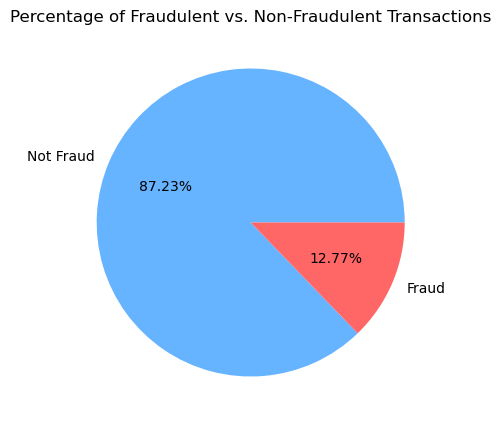

In [23]:
# Create a DataFrame and plot a pie chart
fraud_pie_chart = {'Transaction Type': ['Not Fraud', 'Fraud'], 'Count': [not_fraud_count, fraud_trans_count]}
df = pd.DataFrame(fraud_pie_chart)
plt.figure(figsize=(5, 5))
plt.pie(df['Count'], labels=df['Transaction Type'], autopct='%1.2f%%', colors=['#66b3ff', '#ff6666'])
plt.title('Percentage of Fraudulent vs. Non-Fraudulent Transactions')

# Save the figure
#plt.savefig("Visualizations/PercentageofFraud.png")

plt.show()